# Notebook by: Matt Ellis

# Introduction to Data Science - Project #1 - Sensor Data Preparation

### File Input/Output Functions

You may find the following function useful to read the data.  Feel free to write your own routine instead if you choose.

In [42]:
def read_list_from_file(filespec, conversion=float):
    """Return a list with each line of the input file as an element."""
    with open(filespec) as f:
        # "read" does not provide conversion to types; it returns strings, so we need to convert the data
        lines = list(map(conversion, f.read().splitlines()))
    return(lines)

## Problem Statement

Vibranium is a very valuable element (at least in the Marvel universe).  A leading Vibranium producing country has recently discovered that it can effectively "mine" Vibrainium atoms from air.  One of the most skilled mining engineers has built prototype sensors for detecting Vibranium concentrations.

The engineer has asked you to produce a predictor of Vibranium concentration (number of Vibranium atoms per billion air atoms) based upon air temperature in Celsius using preliminary data she has collected.

Unfortunately, the sensors are prototypes.  As a result, the sensors are sometimes faulty.  You will have to adapt to the faulty data.  The sensor engineer, who clearly has significant domain expertise, will provide some guidance on dealing with sensor challenges.

## Acquiring Data

The engineer has two files containing the sensor data.  One file, "sensor.txt" contains the sensor readings with a single reading per line in the file.

The other file "temperature.txt" contains the Cesius temperature associated with the sensor reading.  
Each line of the temperature file aligns with the corresponding line in the sensor file.

### <span style="color:red">Task</span>

* Read the sensor data into a list.  
* Read the temperature values into another list. 

Insert cells into this notebook here to show your work (do this for all the tasks in this notebook).  

If needed, use your friend, The Internet, to look for ways to read data into a list in Python.

In [43]:
sensor_data = read_list_from_file('sensor.txt')

In [44]:
temperature_data = read_list_from_file('temperature.txt', int)

### <span style="color:red">Task</span>

* Write a Python function to compute and print the following descriptive statistics for an input list.
    - count
    - min 
    - max
    - mean
    - sum
    - mode
    - median
    - population standard deviation
* Call your descriptive statistics function to report individually on the sensor data and the temperature data.

In [45]:
import statistics

In [46]:
def descriptive_stats(data):
    print(f'The number of data points is {len(data)}.')
    print(f'The minimum value in the data is {min(data)}.')
    print(f'The maximum value in the data is {max(data)}.')
    print(f'The mean of the data is {statistics.mean(data):.2f}.')
    print(f'The sum of the data is {sum(data):.2f}.')
    print(f'The mode of the data is {statistics.mode(data)}.')
    print(f'The median of the data is {statistics.median(data)}.')
    print(f'The population standard deviation of the data is {statistics.pstdev(data):.2f}.')

In [47]:
# Call the descriptive statistics function for the sensor data
descriptive_stats(sensor_data)

The number of data points is 200.
The minimum value in the data is -2103.8.
The maximum value in the data is 2420.0.
The mean of the data is 1175.62.
The sum of the data is 235123.00.
The mode of the data is 0.0.
The median of the data is 1380.6.
The population standard deviation of the data is 898.36.


In [48]:
# Call the descriptive statistics function for the temperature data.
descriptive_stats(temperature_data)

The number of data points is 200.
The minimum value in the data is -20.
The maximum value in the data is 30.
The mean of the data is 5.00.
The sum of the data is 1000.00.
The mode of the data is 20.
The median of the data is 4.0.
The population standard deviation of the data is 14.87.


### <span style="color:red">Task</span>

* Write a Python function to compute and print the frequency of each value in an input list.
* Call your frequency function to report individually on the sensor data and the temperature data.

Hint: See Counter example from the collections module from Chapter 6 in the book.

In [49]:
from collections import Counter

In [50]:
def data_frequency(list_data):
    counter = Counter(list_data)
    print(f'{"Data point":<20}{"Frequency"}')
    print(f'{"*" * 33}')
    for data, count in counter.items():
        print(f'{data:<20}{count}')

In [51]:
# Show the frequency of data in sensor data
data_frequency(sensor_data)

Data point          Frequency
*********************************
-1808.0             1
1664.4              1
1382.2              1
2320.4              1
1403.4              1
1766.0              1
-808.8              1
1318.6              1
-1707.4             1
1171.2              1
-1326.6             1
1490.4              1
-2103.8             1
1025.0              1
2103.4              1
1883.4              1
1428.4              1
899.2               1
899.0               1
850.5999999999999   1
1054.8              1
0.0                 14
1801.6              1
-1554.2             1
1250.0              1
861.4000000000001   1
2091.0              1
1770.2              1
2159.8              1
1222.8              2
1793.2              1
1353.8              1
1833.6              1
1332.4              1
991.4000000000001   1
1243.0              1
1879.6              1
1709.0              1
1886.8              1
1201.4              1
1200.2              1
1400.4              1
1615.8     

In [52]:
# Show the frequency of data in temperature data
data_frequency(temperature_data)

Data point          Frequency
*********************************
20                  8
-13                 5
-19                 3
27                  5
-3                  8
-5                  3
-6                  8
-12                 3
-14                 5
23                  6
14                  6
-15                 6
17                  4
7                   5
-18                 4
-7                  5
12                  5
18                  6
15                  5
-8                  3
25                  3
21                  5
24                  4
6                   1
8                   1
-20                 3
28                  6
-10                 7
1                   3
-11                 4
4                   6
2                   3
-4                  5
26                  5
9                   6
-2                  3
19                  1
3                   5
16                  2
-16                 4
22                  2
29                  4
0           

## Visualizing Data

Let's take a look at the raw data we acquired from the engineer.  Show the sensor and temperature data that we read from the files.

### <span style="color:red">Task</span>

* Write a Python function to draw a scatter plot.  
* Plot the sensor data using the temperature as the x-axis and the sensor value as the y-access.
* Label the x-axis as "Temperature" and the y-access as "Sensor".
* Make the title of your plot "Sensor by Temperature (Raw Data)".

You may find it useful to look at the plot examples in the "regression_example" notebook in the project folder.


In [53]:
# Import useful libraries
import os
import numpy as np
import pandas as pd
import sklearn.linear_model

In [54]:
# To plot pretty figures...
%matplotlib inline
from matplotlib import pyplot as plt

In [55]:
def scatter_plot(list1, list2, title):
    plt.scatter(list1, list2)
    plt.xlabel('Temperature')
    plt.ylabel('Sensor')
    plt.title(title)

In [56]:
# Enlarge the graph
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

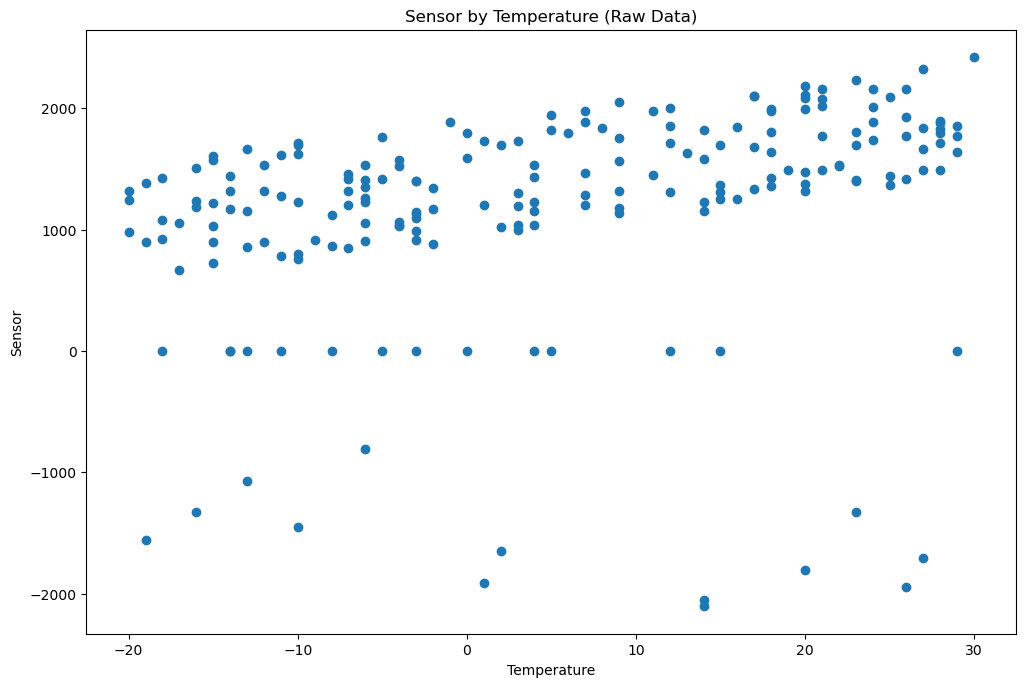

In [57]:
# Plot the sensor data using the temperature as the x-axis and the sensor value as the y-acess
scatter_plot(temperature_data, sensor_data, 'Sensor by Temperature (Raw Data)')

### <span style="color:red">Task</span>

* Write a Python function to draw a bar plot.  
* Plot the frequency of temperature values as a bar plot with an appropriate title.
* Plot the frequency of sensor values as a bar plot with an appropriate title.

You may find it useful to use your friend, The Interent, to look at the information about mapplotlib bar plots.

In [58]:
def freq_plot(list_data, plot_title):
    x = Counter(list_data)
    plt.bar(x.keys(), x.values())
    plt.title(plot_title)
    plt.ylabel('Frequency')
    plt.xlabel('Value')
    plt.show()

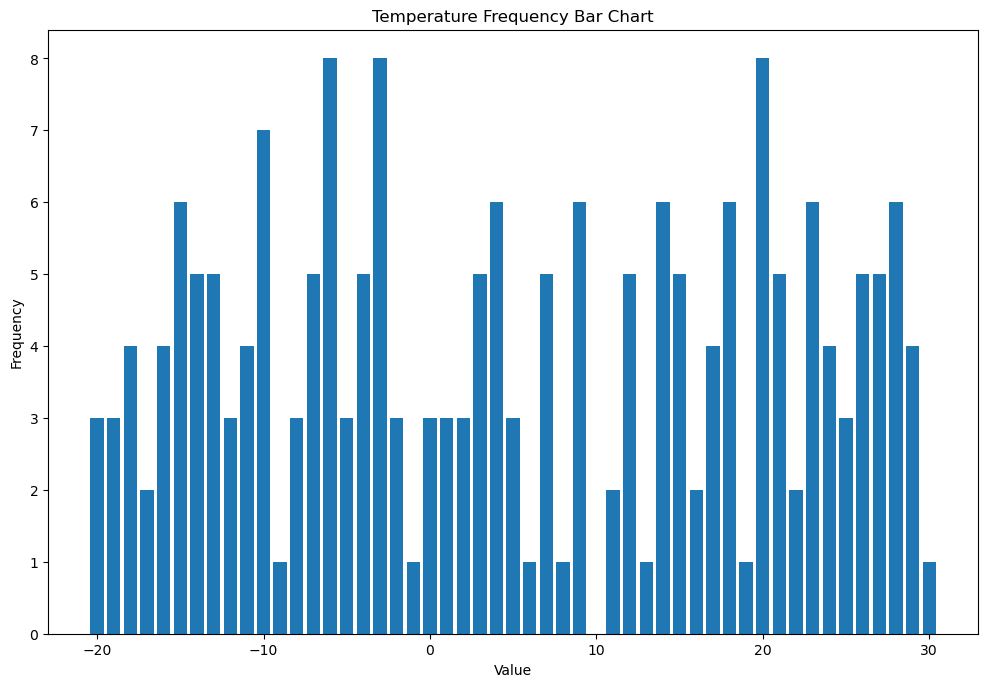

In [59]:
# Plot the frequency of temperature values as a bar plot
freq_plot(temperature_data, 'Temperature Frequency Bar Chart')

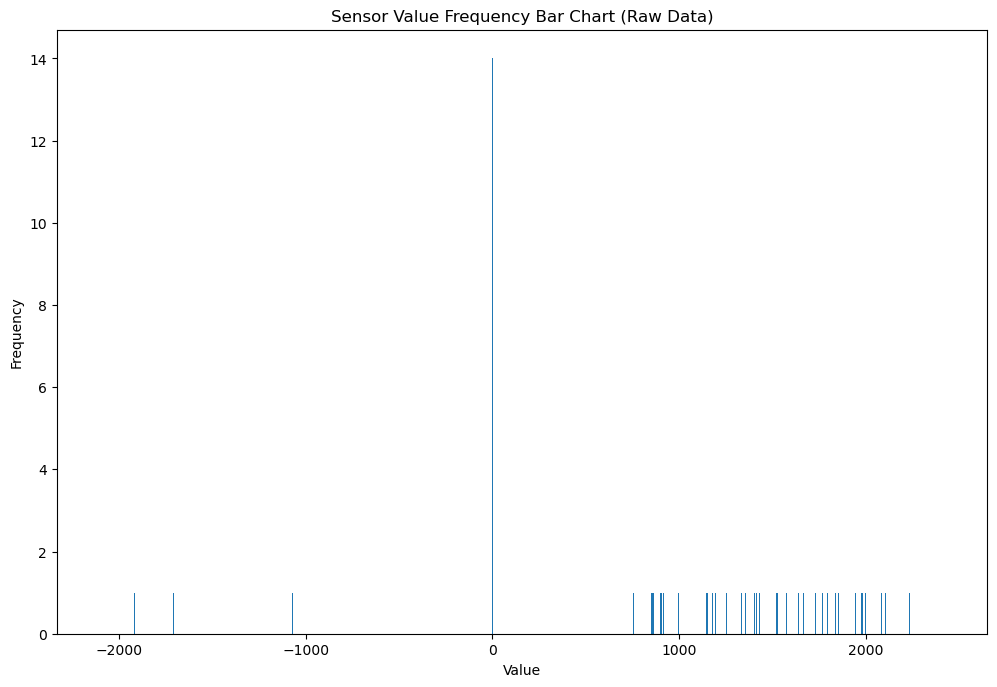

In [60]:
# Plot the frequency of sensor values as a bar plot
freq_plot(sensor_data, 'Sensor Value Frequency Bar Chart (Raw Data)')

## Preparing Data

You noticed some unexpected values in the sensor readings.  You sought out the sensor engineer for some clarification.  She tells you in no uncertain terms that the sensors are prototypes and you should expect errors.

She explains that the maximum valid sensor value is 2000 and the minimum valid value is 1000.  She also explains some other types of sensor errors (described below) and her recommendation on handling the problem.

Three types of sensor errors:
1.  Sometimes the sensor is too slow to capture a reading.  Missing values are represented as sensor values of 0.  Drop these readings.  There is no way to estimate the true value in this case.
2.  There is a sensor bug that sometimes reports the sensor value as a negative value rather than the true positive value.  Replace these valids with the absolute value (positive value) of the reading.
3.  At extreme upper and lower ranges of valid sensor values, sensors may report values below minimum and above maximum.  Replace these values with the valid min or max, as appropriate.

### <span style="color:red">Task</span>

* Write a Python function to correct the sensor errors as guided by the sensor engineer's recommendations.  This function will take as input the temperature list and the sensor list and return two new lists (i.e., the "cleaned" temperature and sensor lists).  Don't destroy your copies of the "raw" lists!
* Produce "clean" lists by calling your "preparation" function on the original temperature and sensor data.

In [61]:
def prep(s_list, t_list):
    c_s_list = []
    c_t_list = []
    
    for i in range(len(s_list)):
        bad_value = False
        values_added = False
        value = s_list[i]
        
        if value == 0:
            bad_value = True
        
        while not bad_value and not values_added:
            # There is a sensor bug that sometimes records a negative value rather than the true positive value.
            # Replace these values with the absolute value.
            if value < 0:
                value = abs(value)
           
            # At extreme upper and lower ranges of valid sensor values, sensors may report values below minimum and above maximum.
            # Replace these values with the valid min or max, as appropriate
            # Maximum valid sensor value is 2000
            # Minimum valid sensor value is 1000
            if value < 1000:
                value = 1000
                c_s_list.append(value)                
            elif value > 2000:
                value = 2000
                c_s_list.append(value)
            else:
                c_s_list.append(value)
                
            # Append corresponding temperature value to the clean temperature data list    
            c_t_list.append(t_list[i])
            
            values_added = True
            
            
    return [c_s_list, c_t_list]

In [62]:
# Clean the data and store the cleaned data in new lists
clean_sensor_data, clean_temperature_data = prep(sensor_data, temperature_data)

### <span style="color:red">Task</span>

* Run your "descriptive statistics" and "frequency" functions on your clean temperature and sensor lists and compare them to the "raw" results.

In [63]:
# Run descriptive statistics on the cleaned sensor data
descriptive_stats(clean_sensor_data)

The number of data points is 186.
The minimum value in the data is 1000.
The maximum value in the data is 2000.
The mean of the data is 1488.33.
The sum of the data is 276829.40.
The mode of the data is 1000.
The median of the data is 1456.8.
The population standard deviation of the data is 331.57.


In [64]:
# Run descriptive statistics on the cleaned temperature data
descriptive_stats(clean_temperature_data)

The number of data points is 186.
The minimum value in the data is -20.
The maximum value in the data is 30.
The mean of the data is 5.49.
The sum of the data is 1021.00.
The mode of the data is 20.
The median of the data is 4.5.
The population standard deviation of the data is 14.89.


### <span style="color:red">Task</span>

* Call your scatter plot function using your prepared data as input.
* The titile for this plot should be "Sensor by Temperature (Prepared Data)".

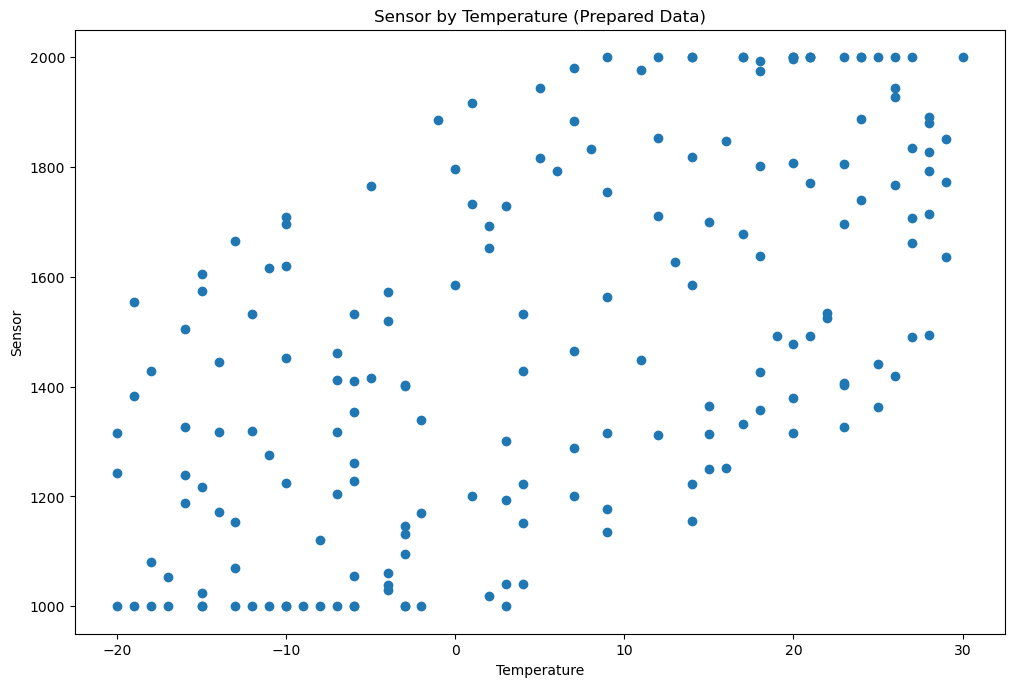

In [65]:
# Call scatter plot function on prepared data
scatter_plot(clean_temperature_data, clean_sensor_data, 'Sensor by Temperature (Prepared Data)')

## Model Building

After looking at the sensor plots, you decide a linear regression model may do a good job fitting the data.  Now, you need to build the model.

You may find it useful to refer to the "regression_example" notebook for hints in building this model.

### <span style="color:red">Task</span>

The scilearn-kit libraries require training data to be in a numpy "array of arrays".  See the referenced notebook above for hints on making that conversion.  

* Create a "training_X" numpy array of arrays from your "prepared" temperature list.
* Create a "training_y" numpy array of arrays from your "prepared" sensor list.

In [66]:
# Create a "training_X" numpy array of arrays from the prepared temperature data
X = np.c_[clean_temperature_data]

In [67]:
# Create a "training_y" numpy array of arrays from the prepared temperature data
Y = np.c_[clean_sensor_data]

### <span style="color:red">Task</span>
* Create a linear model object

See the referenced notebook above for hints.  

## Model Selection

In [68]:
# Create a linear model object
model = sklearn.linear_model.LinearRegression()

### <span style="color:red">Task</span>
* Train the linear model using your training temperature and sensor data.

See the referenced notebook above for hints.  

In [69]:
# Train the linear modeal using the training data
model.fit(X, Y)

LinearRegression()

### <span style="color:red">Task</span>
* Print the equation for the resulting prediction line.

See the referenced notebook above for hints.  

### Examine our thetas

In [70]:
# Show the computed parameters from the model "fit"
t0, t1 = model.intercept_[0], model.coef_[0][0]
t0, t1

(1413.9989483897027, 13.541229774255877)

# Print the equation for the resulting prediction line.

### Sensor value = 1414 + 13.54 * temperature value

### <span style="color:red">Task</span>
* Print a scatter plot of the prepared data with the predicted line superimposed on the data.

See the referenced notebook above for hints.  

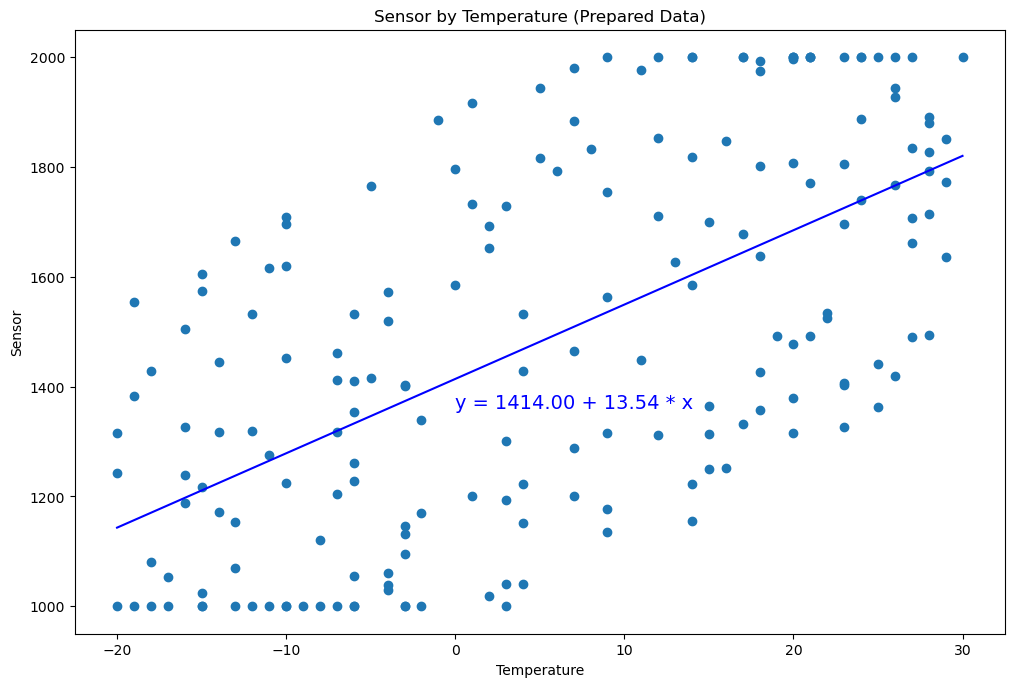

In [71]:
# plot the scatter plot of the sample data
scatter_plot(clean_temperature_data, clean_sensor_data, 'Sensor by Temperature (Prepared Data)')

# An array of arrays of 1000 numbers evenly spaced from -20 to 30
X=np.linspace(-20, 30, 1000)

# plot the predicted line
plt.plot(X, t0 + t1*X, "b")

# print the parameters of the model
plt.text(0, 1360, f"y = {t0:.2f} + {t1:.2f} * x", fontsize=14, color="b")

plt.show()

## Model Usage

Feeling exceptionally brave, you decide to demonstrate the predictions of your model to the sensor engineer.

### <span style="color:red">Task</span>
* Demonstrate your predictor with a single input Celsius value of 5.
* Demonstrate your predictor for the a list of input temperatures: -25, 5, 7, 12, 25

Note that the input to the "predict" method requires a list of lists as input.  Also, the results are returned as list of lists.

See the referenced notebook above for hints.  

In [72]:
# Demonstrate the predictore with a single input Celsius value of 5.
test_temperature = [[5]]
print(f"Test temperature = {test_temperature[0][0]} degrees Celsius")

test_temperature_predicted_sensor_value = model.predict(test_temperature)[0][0]
print(f"Predicted sensor value for {test_temperature[0][0]} Celsius = {test_temperature_predicted_sensor_value:.2f}")

# Demonstrate your predictor for the a list of input temperatures: -25, 5, 7, 12, 25
list_of_predictors = [[-25],[5],[7],[12],[25]]

list_of_pred_predicted_sensor_values = model.predict(list_of_predictors)

for i in range(len(list_of_predictors)):
    print(f'Test value of {list_of_predictors[i][0]} yields a sensor value of {list_of_pred_predicted_sensor_values[i][0]:.2f}')

Test temperature = 5 degrees Celsius
Predicted sensor value for 5 Celsius = 1481.71
Test value of -25 yields a sensor value of 1075.47
Test value of 5 yields a sensor value of 1481.71
Test value of 7 yields a sensor value of 1508.79
Test value of 12 yields a sensor value of 1576.49
Test value of 25 yields a sensor value of 1752.53


### "Raw" or "Prepared"?

What would the predicted line have been without "fixing" the data at all?

### <span style="color:red">Task</span>
* Build a new linear model using the "raw" data instead of the "prepared" data.
* Print the equation for the "raw" prediction line.
* Demonstrate this "raw" predictor with a single input Celsius value of 5.
* Demonstrate this "raw" predictor for the a list of input temperatures: -25, 5, 7, 12, 25

In [73]:
# Build a new linear model using the "raw" data

# Create a "training_X" numpy array of arrays from the prepared temperature data
X = np.c_[temperature_data]

# Create a "training_y" numpy array of arrays from the prepared temperature data
Y = np.c_[sensor_data]

# Create a linear model object
raw_data_model = sklearn.linear_model.LinearRegression()

# Train the linear modeal using the training data
model.fit(X, Y)

# Show the computed parameters from the model "fit"
t0, t1 = model.intercept_[0], model.coef_[0][0]
t0, t1 

(1096.0892104786897, 15.905157904262058)

In [74]:
# Print the equation for the "raw" prediction line
print(f'sensor value = {t0:.2f} + {t1:.2f} * temperature value')

sensor value = 1096.09 + 15.91 * temperature value


In [75]:
# demonstrate this "raw" predictor with a single input Celsius value of 5.
test_temperature_predicted_sensor_value = model.predict(test_temperature)[0][0]
print(f"Predicted sensor value for {test_temperature[0][0]} Celsius = {test_temperature_predicted_sensor_value:.2f}")

Predicted sensor value for 5 Celsius = 1175.62


In [76]:
# demonstrate this "raw" predictor for the list of input temperatures: -25, 5, 7, 12, 25
list_of_pred_predicted_sensor_values = model.predict(list_of_predictors)

for i in range(len(list_of_predictors)):
    print(f'Test value of {list_of_predictors[i][0]} yields a sensor value of {list_of_pred_predicted_sensor_values[i][0]:.2f}')

Test value of -25 yields a sensor value of 698.46
Test value of 5 yields a sensor value of 1175.62
Test value of 7 yields a sensor value of 1207.43
Test value of 12 yields a sensor value of 1286.95
Test value of 25 yields a sensor value of 1493.72


### <span style="color:red">Task</span>
* Plot your "raw" predictor line against the "raw" data scatter plot.

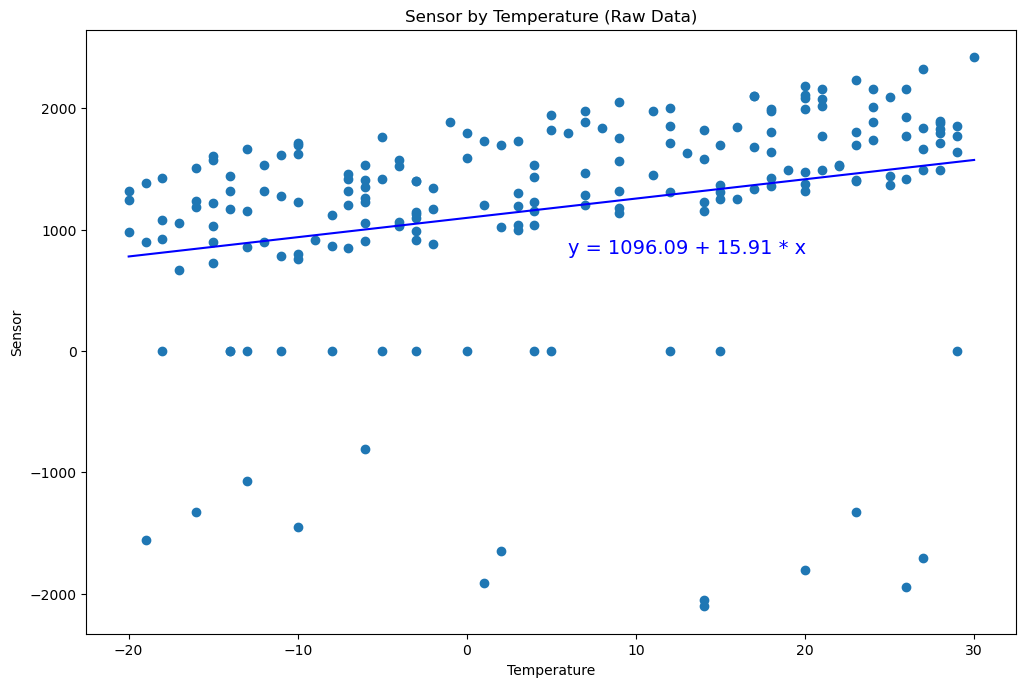

In [77]:
# plot the "raw" predictor line against the "raw" data scatter plot
# plot the scatter plot of the sample data
scatter_plot(temperature_data, sensor_data, 'Sensor by Temperature (Raw Data)')

# An array of arrays of 1000 numbers evenly spaced from -20 to 30
X=np.linspace(-20, 30, 1000)

# plot the predicted line
plt.plot(X, t0 + t1*X, "b")

# print the parameters of the model
plt.text(6, 800, f"y = {t0:.2f} + {t1:.2f} * x", fontsize=14, color="b")

plt.show()

## Results

You need to report your results to the sensor engineer.  Most of your results are captured in the results above, but there is potentially more to do.


### <span style="color:red">Task</span>

* How does the "prepared" predictor compare with the "raw" predictor?  Is one better than the other?  If so, why?
* What do you suggest that you and the sensor engineer do to assess the quality of the predictions, perhaps including further actions to take?

As can be seen from the graphs and data above, the "raw" predictor gives us results which are too low. This is due to the 0s and negative sensor values contained in the original data. So, the "prepared" predictor gives us a better prediction. 